In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
Sales = pd.read_csv(r'C:\Users\E166017\OneDrive - Mohawk Industries\Documents\Python Scripts\Supermarket Sales Analysis with Data Science Kaggle.csv')
# import Supermarket Sales Analysis with Data Science from Kaggle

In [6]:
print (Sales.head(5))

    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:

In [48]:
Sales.info()
#info on the DataFrame, data types: 17 columns(7 Floats, 1 integer, 9 objects).  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [7]:
Sales_grouped_Min = Sales.groupby(['Gender']).min()
# group the column "gender" under Minimum values

In [8]:
print (Sales_grouped_Min)

         Invoice ID Branch      City Customer type            Product line  \
Gender                                                                       
Female  101-81-4070      A  Mandalay        Member  Electronic accessories   
Male    101-17-6199      A  Mandalay        Member  Electronic accessories   

        Unit price  Quantity  Tax 5%    Total      Date   Time Payment   cogs  \
Gender                                                                          
Female       10.16         1  0.6045  12.6945  1/1/2019  10:00    Cash  12.09   
Male         10.08         1  0.5085  10.6785  1/1/2019  10:00    Cash  10.17   

        gross margin percentage  gross income  Rating  
Gender                                                 
Female                 4.761905        0.6045     4.0  
Male                   4.761905        0.5085     4.0  


In [9]:
Sales_grouped_Min.to_csv(r'C:\Users\E166017\OneDrive - Mohawk Industries\Documents\Python Scripts\Output.csv')
# export the result variable "Sales_grouped_Min" as a csv file.

In [10]:
Sales_grouped_Min = Sales.groupby(['Product line']).min()
# group the column "Product line" under Max values under variable "Sales_grouped_Min".

In [11]:
print (Sales_grouped_Min)

                         Invoice ID Branch      City Customer type  Gender  \
Product line                                                                 
Electronic accessories  114-35-5271      A  Mandalay        Member  Female   
Fashion accessories     105-10-6182      A  Mandalay        Member  Female   
Food and beverages      101-17-6199      A  Mandalay        Member  Female   
Health and beauty       101-81-4070      A  Mandalay        Member  Female   
Home and lifestyle      106-35-6779      A  Mandalay        Member  Female   
Sports and travel       102-06-2002      A  Mandalay        Member  Female   

                        Unit price  Quantity  Tax 5%    Total      Date  \
Product line                                                              
Electronic accessories       10.56         1  1.2725  26.7225  1/1/2019   
Fashion accessories          10.18         1  0.6045  12.6945  1/1/2019   
Food and beverages           10.13         1  1.0790  22.6590  1/1/2019   


In [12]:
Sales_grouped_Min.to_csv(r'C:\Users\E166017\OneDrive - Mohawk Industries\Documents\Python Scripts\Sales_group_min.csv')
# export to a csv file called "Sales_group_min.csv"

In [13]:
Rebate = {'Product line' : ['Electronic accessories', 'Fashion accessories', 'Food and beverages', 'Health and beauty', 'Home and lifestyle', 'Sports and travel'],
                         'Rebate' :[0.05, 0.10, 0.10, 0.20, 0.10, 0.50]}
# Set up a dictionary on rebate categories and rates under variable "Rebate".  Two columns "Product line" and "Rebate".

In [14]:
df_rebate = pd.DataFrame(Rebate)
#Convert dictionary to a DataFrame called "df_rebate".

In [15]:
print (df_rebate)

             Product line  Rebate
0  Electronic accessories    0.05
1     Fashion accessories    0.10
2      Food and beverages    0.10
3       Health and beauty    0.20
4      Home and lifestyle    0.10
5       Sports and travel    0.50


In [16]:
inner = pd.merge(Sales, df_rebate, on='Product line')
# now that the dictionary is a recognised dataframe I can merge it with the Sales dataframe using the key "Product line" 
#as a new variable "inner".

In [17]:
print (inner.head())
# now the new data has the rebate rates on each row based on matching key "Product line".

    Invoice ID Branch    City Customer type  Gender       Product line  \
0  750-67-8428      A  Yangon        Member  Female  Health and beauty   
1  123-19-1176      A  Yangon        Member    Male  Health and beauty   
2  665-32-9167      A  Yangon        Member  Female  Health and beauty   
3  829-34-3910      A  Yangon        Normal  Female  Health and beauty   
4  656-95-9349      A  Yangon        Member  Female  Health and beauty   

   Unit price  Quantity   Tax 5%     Total       Date   Time      Payment  \
0       74.69         7  26.1415  548.9715   1/5/2019  13:08      Ewallet   
1       58.22         8  23.2880  489.0480  1/27/2019  20:33      Ewallet   
2       36.26         2   3.6260   76.1460  1/10/2019  17:15  Credit card   
3       71.38        10  35.6900  749.4900  3/29/2019  19:21         Cash   
4       68.93         7  24.1255  506.6355  3/11/2019  11:03  Credit card   

     cogs  gross margin percentage  gross income  Rating  Rebate  
0  522.83                

In [18]:
inner.info()
#info on the DataFrame, data types: 18 columns(8 Floats, 1 integer, 9 objects).  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [19]:
inner.describe()
#info for each column, all quick insights mean/std/min/max etc.

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Rebate
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270,0.173100
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858,0.152265
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000,0.050000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000,0.100000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000,0.100000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000,0.200000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000,0.500000


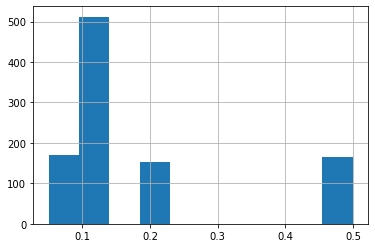

In [98]:
inner.Rebate.hist();
#Displaying the distribution of the rebate

In [21]:
inner.to_csv(r'C:\Users\E166017\OneDrive - Mohawk Industries\Documents\Python Scripts\Rebate_merge.csv')
#Saved the DataFrame to address above, file named "Rebate_merge.csv".

In [22]:
for ind, row in inner.iterrows():
    inner.loc[ind, "Rebate value"] = row['Total'] * row['Rebate']
    # add a new calculated column called "Rebate value" from columns Sales * Rebate using loop function.

In [23]:
inner.head(10)
#call the first ten rows of data.

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Rebate,Rebate value
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,0.2,109.7943
1,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,0.2,97.8096
2,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2,0.2,15.2292
3,829-34-3910,A,Yangon,Normal,Female,Health and beauty,71.38,10,35.6900,749.4900,3/29/2019,19:21,Cash,713.80,4.761905,35.6900,5.7,0.2,149.8980
4,656-95-9349,A,Yangon,Member,Female,Health and beauty,68.93,7,24.1255,506.6355,3/11/2019,11:03,Credit card,482.51,4.761905,24.1255,4.6,0.2,101.3271
5,371-85-5789,B,Mandalay,Normal,Male,Health and beauty,87.98,3,13.1970,277.1370,3/5/2019,10:40,Ewallet,263.94,4.761905,13.1970,5.1,0.2,55.4274
6,848-62-7243,A,Yangon,Normal,Male,Health and beauty,24.89,9,11.2005,235.2105,3/15/2019,15:36,Cash,224.01,4.761905,11.2005,7.4,0.2,47.0421
7,595-11-5460,A,Yangon,Normal,Male,Health and beauty,96.58,2,9.6580,202.8180,3/15/2019,10:12,Credit card,193.16,4.761905,9.6580,5.1,0.2,40.5636
8,333-73-7901,C,Naypyitaw,Normal,Female,Health and beauty,54.92,8,21.9680,461.3280,3/23/2019,13:24,Ewallet,439.36,4.761905,21.9680,7.6,0.2,92.2656
9,617-15-4209,C,Naypyitaw,Member,Male,Health and beauty,15.37,2,1.5370,32.2770,3/16/2019,19:47,Cash,30.74,4.761905,1.5370,7.2,0.2,6.4554


In [24]:
inner.to_csv(r'C:\Users\E166017\OneDrive - Mohawk Industries\Documents\Python Scripts\Rebate_value.csv')

In [25]:
for ind, row in inner.iterrows():
    inner.loc[ind, "Net sales"] = row['Total'] - row['Rebate value'] 
    # subtracting rebate value from total sales column and creating net sales column.

In [26]:
for ind, row in inner.iterrows():
    inner.loc[ind, "Top Hat"] = row['Net sales'] * 0.02
    # applying additional rebate on net sales column.

In [27]:
inner.head(5)
#Run the data on the first 5 rows to check rebate result.

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,Rebate,Rebate value,Net sales,Top Hat
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,13:08,Ewallet,522.83,4.761905,26.1415,9.1,0.2,109.7943,439.1772,8.783544
1,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,20:33,Ewallet,465.76,4.761905,23.2880,8.4,0.2,97.8096,391.2384,7.824768
2,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,...,17:15,Credit card,72.52,4.761905,3.6260,7.2,0.2,15.2292,60.9168,1.218336
3,829-34-3910,A,Yangon,Normal,Female,Health and beauty,71.38,10,35.6900,749.4900,...,19:21,Cash,713.80,4.761905,35.6900,5.7,0.2,149.8980,599.5920,11.991840
4,656-95-9349,A,Yangon,Member,Female,Health and beauty,68.93,7,24.1255,506.6355,...,11:03,Credit card,482.51,4.761905,24.1255,4.6,0.2,101.3271,405.3084,8.106168


In [28]:
inner.to_csv(r'C:\Users\E166017\Project 2023\Project-2023\Rebate_value_TH.csv', index=False)
#Save the dataframe to a csv file and use the index=False to drop the index column.

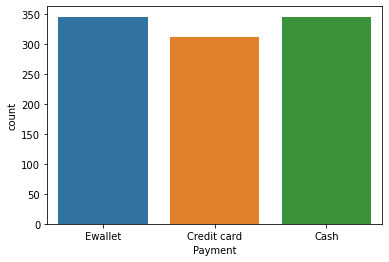

In [95]:
sns.countplot(data=inner['Quantity'], x=inner['Payment']);
#Ewallet and cash have a higher count Quanity use than credit card payments.

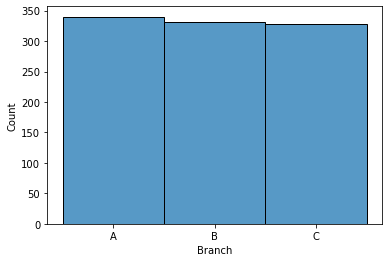

In [99]:
sns.histplot(inner['Branch'], bins=5);
#Variable distribution of branches used.  Branch A used more than B or C.

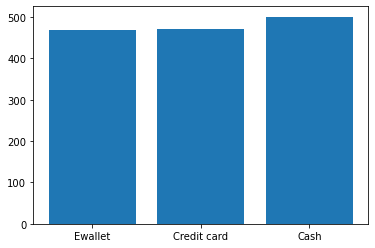

In [118]:
plt.bar(x = inner['Payment'], height=inner['Rebate value']);
#More rebate paid out on cash payments.

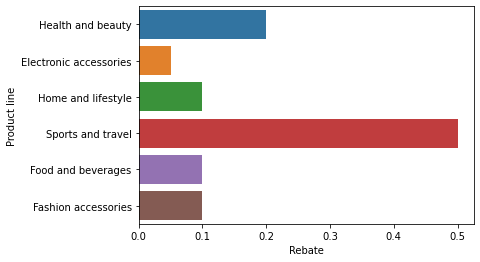

In [96]:
sns.barplot(y=inner['Product line'], x=inner['Rebate']);
#Home and lifestyle has more rebate benefits whereas Electronics has the least return on rebate.

In [33]:
#Webscraping data from a table on Wikipedia.

In [34]:
url = ("https://en.wikipedia.org/wiki/List_of_countries_by_rail_transport_network_size#List")
#Webscraped data table,  variable "url" against a website with a data table.

In [35]:
tables = pd.read_html(url)
#new variable "tables" over old variable "url".

In [36]:
len(tables)
#Check how many tables are on the webpage.  4.

4

In [37]:
tables[0]
#Select table 0 from the page.

,Country/Territory,Length(km),Electrified length (km),% of the total electrified,Historical peaklength (km),Area (km2) per route km,Population per route km,Nationalisedor private[a],Data year,Notes,ISO 3166-1
0,United States,220480,"2,025[1]",0.92%,"408,833[2]",43.2,2060,Freight services private. Passenger operations...,2014,[3],840.0
1,China,150000,"100,000[4]",66.67%,"150,000 (in 2021)",63.80[4],"9,570[4]",Nationalised,2021,[4],156.0
2,Russia,85600,43800,51.17%,150000,199.98,1678,Nationalised,2022,[5],643.0
3,India,68103,"58,000[6]",85.00%,NaN,48.23,20424,Nationalised,2023,[7],356.0
4,Canada,49422,129,0.20%,NaN,214.48,674,"Freight services private, Passenger operations...",2017,[8],124.0
...,...,...,...,...,...,...,...,...,...,...,...
148,Niger,143,0,0.00%,NaN,NaN,NaN,Private,NaN,NaN,562.0
149,Qatar,82,82,100%,NaN,NaN,NaN,NaN,NaN,NaN,634.0
150,South Sudan,248,0,0%,NaN,NaN,NaN,NaN,NaN,NaN,728.0
151,European Union[g],208211,117599,56.48%,"~223,000[h]",20.46,2347,Both,2017,[9],NaN


In [38]:
df = tables[0]
#Naming the new variable "df"

In [39]:
df.info()
#Getting info on imported table, 11 columns (1 Float, 10 objects)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country/Territory           153 non-null    object 
 1   Length(km)                  153 non-null    object 
 2   Electrified length (km)     79 non-null     object 
 3   % of the total electrified  152 non-null    object 
 4   Historical peaklength (km)  34 non-null     object 
 5   Area (km2) per route km     150 non-null    object 
 6   Population per route km     150 non-null    object 
 7   Nationalisedor private[a]   110 non-null    object 
 8   Data year                   150 non-null    object 
 9   Notes                       109 non-null    object 
 10  ISO 3166-1                  147 non-null    float64
dtypes: float64(1), object(10)
memory usage: 13.3+ KB


In [40]:
df.isnull().sum()
#Check the amount of null values per column

Country/Territory               0
Length(km)                      0
Electrified length (km)        74
% of the total electrified      1
Historical peaklength (km)    119
Area (km2) per route km         3
Population per route km         3
Nationalisedor private[a]      43
Data year                       3
Notes                          44
ISO 3166-1                      6
dtype: int64

In [41]:
df.rename(columns = {'Length(km)':'Length_km', 'Country/Territory':'Country_Territory', 'Electrified length (km)': 'Electrified_length_km', 'Area (km2) per route km': 'Area_km2_per_route_km', 'Nationalisedor private[a': 'Nationalisedor private_a', '% of the total electrified': 'Percentage_of_the_total_electrified', 'Population per route km': 'Population_per_route_km'})
#renamed columns to allow hist chart

,Country_Territory,Length_km,Electrified_length_km,Percentage_of_the_total_electrified,Historical peaklength (km),Area_km2_per_route_km,Population_per_route_km,Nationalisedor private[a],Data year,Notes,ISO 3166-1
0,United States,220480,"2,025[1]",0.92%,"408,833[2]",43.2,2060,Freight services private. Passenger operations...,2014,[3],840.0
1,China,150000,"100,000[4]",66.67%,"150,000 (in 2021)",63.80[4],"9,570[4]",Nationalised,2021,[4],156.0
2,Russia,85600,43800,51.17%,150000,199.98,1678,Nationalised,2022,[5],643.0
3,India,68103,"58,000[6]",85.00%,NaN,48.23,20424,Nationalised,2023,[7],356.0
4,Canada,49422,129,0.20%,NaN,214.48,674,"Freight services private, Passenger operations...",2017,[8],124.0
...,...,...,...,...,...,...,...,...,...,...,...
148,Niger,143,0,0.00%,NaN,NaN,NaN,Private,NaN,NaN,562.0
149,Qatar,82,82,100%,NaN,NaN,NaN,NaN,NaN,NaN,634.0
150,South Sudan,248,0,0%,NaN,NaN,NaN,NaN,NaN,NaN,728.0
151,European Union[g],208211,117599,56.48%,"~223,000[h]",20.46,2347,Both,2017,[9],NaN


In [42]:
df = df.replace(np.nan, 0)
#replace all "nan" values with "0"

In [47]:
df.head(10)
#Check that nan values have been replaced.

,Country Territory,Length_km,Electrified_length_km,Percentage_of_the_total_electrified,Historical peaklength (km),Area_km2_per_route_km,Population per route km,Nationalisedor private[a],Data year,Notes,ISO_3166_1
0,United States,220480,"2,025[1]",0.92%,"408,833[2]",43.2,2060,Freight services private. Passenger operations...,2014,[3],840.0
1,China,150000,"100,000[4]",66.67%,"150,000 (in 2021)",63.80[4],"9,570[4]",Nationalised,2021,[4],156.0
2,Russia,85600,43800,51.17%,150000,199.98,1678,Nationalised,2022,[5],643.0
3,India,68103,"58,000[6]",85.00%,0,48.23,20424,Nationalised,2023,[7],356.0
4,Canada,49422,129,0.20%,0,214.48,674,"Freight services private, Passenger operations...",2017,[8],124.0
5,Germany,40625,22500,55.38%,64000,9.26,2145,"Nationalised, with private freight and passeng...",2017,[9],276.0
6,Argentina,36966,190,0.51%,47000,77.45,1117,Both,2014,[8],32.0
7,Australia,33168,3393,10.23%,0,231.91,742,Both,2017,[10],36.0
8,Brazil,29817,9025,30.27%,0,299.6,7225,Both[b],2014,[11],76.0
9,France,29273,15687,53.59%,42500,22.78,2374,Nationalised,2017,[9],250.0


In [43]:
df = df.rename(columns = {'Length(km)':'Length_km', 'Country/Territory':'Country Territory', 'Electrified length (km)': 'Electrified_length_km', 'Area (km2) per route km': 'Area_km2_per_route_km', 'Nationalisedor private[a': 'Nationalisedor private_a', '% of the total electrified': 'Percentage_of_the_total_electrified', 'ISO 3166-1': 'ISO_3166_1'})

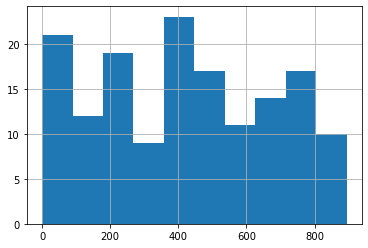

In [97]:
df.ISO_3166_1.hist();

In [45]:
df.to_csv(r'C:\Users\E166017\Railway cleaned version.csv', index=False)
#Saved file to address using index=False to drop the index column.